In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

In [2]:
#adata = sc.read_h5ad("hgsoc_integrated_scvi_sampleID_GSEID.h5ad") #I used this data for cell-label and downstream

In [3]:
#sc.pp.neighbors(adata, use_rep = "X_scVI")
#sc.tl.umap(adata)
#sc.tl.leiden(adata)

In [4]:
#cell_label = {"0": "Fibroblast","1": "Epithelial","2": "T cell","3": "Fibroblast","4": "Fibroblast","5": "Myeloid cell / macrophage","6": "T cell","7": "T cell","8": "Fibroblast","9": "Epithelial","10": "T cell","11": "Fibroblast","12": "Fibroblast","13": "Fibroblast","14": "T cell","15": "T cell","16": "Myeloid cell / macrophage","17": "Fibroblast","18": "Endothelial","19": "Fibroblast","20": "Fibroblast","21": "Epithelial","22": "T cell","23": "Endothelial","24": "Myeloid cell / macrophage","25": "Fibroblast","26": "Epithelial","27": "Epithelial","28": "B cell / plasma cell","29": "T cell","30": "T cell","31": "Epithelial","32": "Epithelial","33": "Fibroblast","34": "Mast cell","35": "Epithelial","36": "unknown","37": "Fibroblast","38": "B cell / plasma cell","39": "T cell","40": "B cell / plasma cell","41": "Fibroblast","42": "Fibroblast"}

In [5]:
#marker_genes = pd.read_csv("Marker_genes_CellMarker2.0.csv")

In [6]:
#adata.obs["cell_type"] = adata.obs.leiden.map(cell_label)

In [7]:
#adata.write_h5ad("hgsoc_integrated_scvi_sampleID_GSEID_cell_label.h5ad")

In [8]:
adata= sc.read_h5ad("hgsoc_integrated_scvi_sampleID_GSEID_cell_label.h5ad")

In [9]:
adata

AnnData object with n_obs × n_vars = 118173 × 21526
    obs: 'cell_id', 'sample_id', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'GSE_ID', 'First_Author', 'Journal', 'Year', 'GSE_ID_with_numbers', 'GSM_ID', 'adata.obs.', 'patient_description_in_GSE', 'Treatment Status', 'Clinical stage', 'Clinical stage (Major)', 'Cell', '_scvi_batch', '_scvi_labels', 'leiden', 'cell_type'
    var: 'n_cells'
    uns: 'GSE_ID_colors', 'Treatment Status_colors', '_scvi_manager_uuid', '_scvi_uuid', 'cell_type_colors', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'umap'
    obsm: 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs'
    layers: 'counts', 'scvi_normalized'
    obsp: 'connectivities', 'distances'

In [10]:
adata.obs['Treatment Status'].unique()

['After chemotherapy', 'Before chemotherapy', 'Control']
Categories (3, object): ['After chemotherapy', 'Before chemotherapy', 'Control']

In [11]:
print(len(adata.obs[adata.obs['Treatment Status'] == 'Before chemotherapy']))
print(len(adata.obs[adata.obs['Treatment Status'] == 'After chemotherapy']))
print(len(adata.obs[adata.obs['Treatment Status'] == 'Control']))

29681
49233
39259


In [10]:
#https://bytemeta.vip/repo/scverse/scanpy/issues/2239
adata.uns['log1p']["base"] = None

In [11]:
adata.X.max()

8.911041230987292

In [12]:
adata.raw

In [13]:
adata.raw.X.max()

8.911041230987292

/Users/titai/miniconda3/envs/pyscenic/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


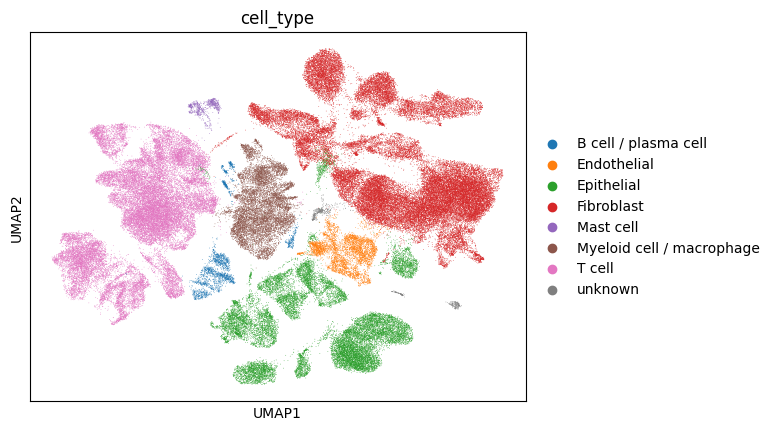

In [14]:
sc.pp.neighbors(adata, use_rep = "X_scVI")
sc.tl.umap(adata)
sc.pl.umap(adata, color = ["cell_type"])

In [15]:
adata

AnnData object with n_obs × n_vars = 118173 × 21526
    obs: 'cell_id', 'sample_id', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'GSE_ID', 'First_Author', 'Journal', 'Year', 'GSE_ID_with_numbers', 'GSM_ID', 'adata.obs.', 'patient_description_in_GSE', 'Treatment Status', 'Clinical stage', 'Clinical stage (Major)', 'Cell', '_scvi_batch', '_scvi_labels', 'leiden', 'cell_type'
    var: 'n_cells'
    uns: 'GSE_ID_colors', 'Treatment Status_colors', '_scvi_manager_uuid', '_scvi_uuid', 'cell_type_colors', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'umap'
    obsm: 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs'
    layers: 'counts', 'scvi_normalized'
    obsp: 'connectivities', 'distances'

In [16]:
clinical_info = pd.read_csv("clinical_info_20230927.csv")

In [17]:
df = adata.obs
df = pd.merge(df, clinical_info, on="GSM_ID", how="inner")
df.index = df['cell_id']

In [18]:
adata.obs = df

In [19]:
adata.obs.columns

Index(['cell_id', 'sample_id', 'doublet', 'n_genes', 'n_genes_by_counts',
       'total_counts', 'total_counts_mt', 'pct_counts_mt', 'GSE_ID',
       'First_Author', 'Journal', 'Year', 'GSE_ID_with_numbers', 'GSM_ID',
       'adata.obs.', 'patient_description_in_GSE', 'Treatment Status',
       'Clinical stage', 'Clinical stage (Major)', 'Cell', '_scvi_batch',
       '_scvi_labels', 'leiden', 'cell_type', 'Patient', 'Patient_2',
       'location', 'Patient_Treatment_Status',
       'Patient_Treatment_Status_Detailed'],
      dtype='object')

/Users/titai/miniconda3/envs/pyscenic/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


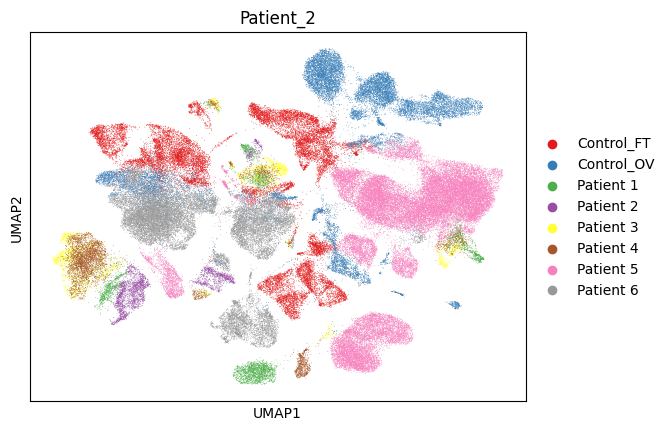

In [20]:
sc.pl.umap(adata, color = ['Patient_2'], palette="Set1")

/Users/titai/miniconda3/envs/pyscenic/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


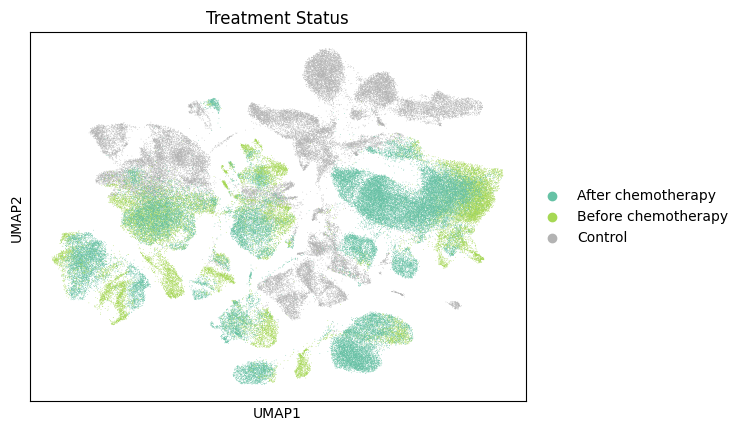

In [21]:
sc.pl.umap(adata, color = ['Treatment Status'], palette="Set2", ncols = 3)

/Users/titai/miniconda3/envs/pyscenic/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


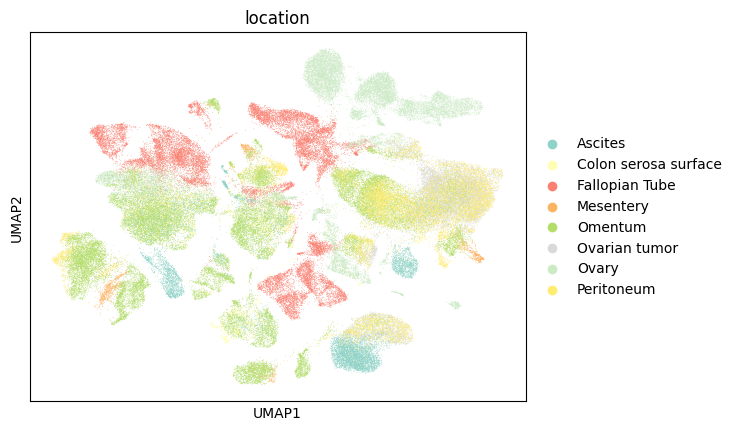

In [22]:
sc.pl.umap(adata, color = ['location'], palette="Set3", ncols = 3)

In [ ]:
#adata.obs['Patient'] = adata.obs['Patient'].apply(str)

In [ ]:
patient_list = sorted(adata.obs['Patient_Treatment_Status'].unique())

In [ ]:
patient_list

In [ ]:
cell_type_list = sorted(adata.obs['cell_type'].unique())

In [ ]:
patient_cell_type = {}

for patient in patient_list:
    patient_cell_type[patient] = {}
    for cell in cell_type_list:
        bdata = adata.obs[adata.obs['Patient_Treatment_Status'] == patient]
        cdata = bdata[bdata['cell_type'] == cell]
        patient_cell_type[patient][cell] = len(cdata)

In [ ]:
data = patient_cell_type["Patient 1-After Chemotherapy"]

# Create a DataFrame from the dictionary with the keys as the index
df = pd.DataFrame(list(data.items()), columns=['Category', "Patient 1-After Chemotherapy"])
df.set_index("Category", inplace=True)

In [ ]:
df_list = []

for patient in patient_list:
    data = patient_cell_type[patient]
    df = pd.DataFrame(list(data.items()), columns=['Category', patient])
    df.set_index("Category", inplace=True)
    df_list.append(df)

In [ ]:
df = pd.concat(df_list, axis=1)

In [ ]:
total = []

for col in df.columns:
    total.append(df[col].sum())

In [ ]:
df_percent = df.copy()

In [ ]:
for col in range(len(df.columns)):
    num = total[col]
    for row in range(len(df)):
        df_percent.iloc[row, col] = df.iloc[row, col]/num

In [ ]:
df = df.T

In [ ]:
df["category"] = df.index
df = df.sort_values(by="category", ascending=False)

In [ ]:
ax = df.plot.barh(stacked=True, edgecolor='none')

horiz_offset = 1.5
vert_offset = 1.
ax.legend(bbox_to_anchor=(horiz_offset, vert_offset))

In [ ]:
df_percent = df_percent.T

df_percent["category"] = df_percent.index
df_percent = df_percent.sort_values(by="category", ascending=False)

ax = df_percent.plot.barh(stacked=True, edgecolor='none')

horiz_offset = 1.5
vert_offset = 1.
ax.legend(bbox_to_anchor=(horiz_offset, vert_offset))

In [23]:
marker_genes_dict ={
    "B cell / plasma cell": ['CD79A', 'CD79B'],
    'Endothelial': ['CLDN5', 'VWF'],
    'Epithelial':['KRT18', 'KRT19'],
    'Fibroblast': ['DCN', 'COL1A1'],
    'Mast cell': ['TPSAB1', 'TPSB2'],
    'Myeloid cell / macrophage': ['AIF1', 'CD68'],
    'T cell': ['CD3D', 'CD3E']
}

In [29]:
marker_genes_dict ={
    "B cell": ['CD79A', 'CD79B'],
    'Endo': ['CLDN5', 'VWF'],
    'Epi':['KRT18', 'KRT19'],
    'Fib': ['DCN', 'COL1A1'],
    'Mast': ['TPSAB1', 'TPSB2'],
    'Myelo': ['AIF1', 'CD68'],
    'T cell': ['CD3D', 'CD3E']
}

/Users/titai/miniconda3/envs/pyscenic/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


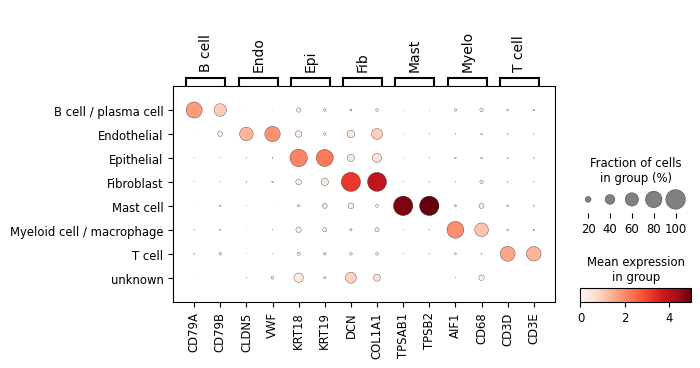

In [30]:
sc.pl.dotplot(adata, marker_genes_dict, 'cell_type', dendrogram=False)

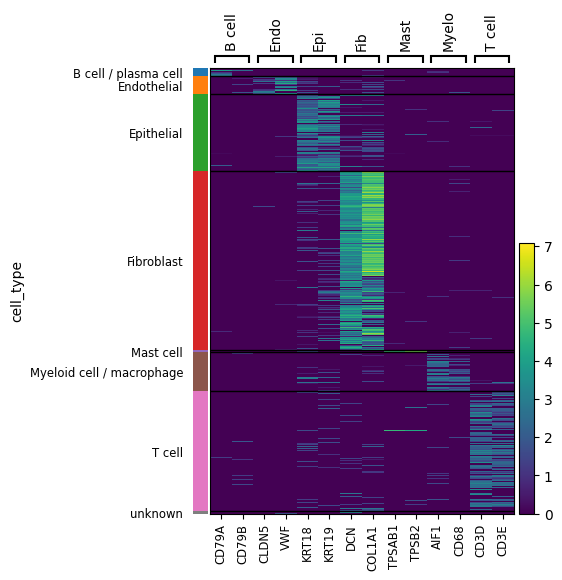

In [33]:
ax = sc.pl.heatmap(adata, marker_genes_dict, groupby='cell_type', cmap='viridis', dendrogram=False, save = 'heatmap.pdf')

In [ ]:
# B cell / plasma cell
sc.pl.umap(adata, color = ['CD79A', 'CD79B', 'CD19'], ncols = 3)

In [ ]:
# T cell
sc.pl.umap(adata, color = ['CD3D', 'CD3E', 'CD8A'], ncols = 3)

In [ ]:
# Mast cell
sc.pl.umap(adata, color = ['TPSAB1', 'TPSB2'], ncols=2)

In [ ]:
#Myeloid cell / macrophage
sc.pl.umap(adata, color = ['AIF1', 'CD68', 'CD14'], ncols = 3)

In [ ]:
#Endothelial
sc.pl.umap(adata, color = ['PECAM1', 'CLDN5', 'VWF'], ncols=3)

In [ ]:
#Fibroblast
sc.pl.umap(adata, color = ['DCN', 'COL1A1'], ncols=2)

In [ ]:
#Epithelial
sc.pl.umap(adata, color = ['EPCAM', 'KRT18', 'KRT19'], ncols = 3)

In [ ]:
sc.tl.rank_genes_groups(adata, groupby='cell_type', method='wilcoxon')

In [ ]:
sc.pl.rank_genes_groups_dotplot(adata, n_genes=4)

In [ ]:
marker_gene_name = pd.DataFrame(adata.uns['rank_genes_groups']['names'])
marker_gene_name.head(10)

In [ ]:
marker_gene_score = pd.DataFrame(adata.uns['rank_genes_groups']['scores'])
marker_gene_score.head(3)

In [ ]:
marker_gene_padj = pd.DataFrame(adata.uns['rank_genes_groups']['pvals_adj'])
marker_gene_padj.head(3)

In [ ]:
marker_gene_logfc = pd.DataFrame(adata.uns['rank_genes_groups']['logfoldchanges'])
marker_gene_logfc.head(3)

In [ ]:
marker_gene_logfc.iloc[10,:]

In [ ]:
adata

In [ ]:
!ls *.h5ad

In [ ]:
adata.write_h5ad("hgsoc_with_clinical_details.h5ad")

In [ ]:
sc.pl.umap(adata, color = ["cell_type", "Treatment Status", "Patient", 'location'], ncols = 1)

In [ ]:
ax = sc.pl.heatmap(adata, marker_genes_dict, groupby='Treatment Status', cmap='viridis', dendrogram=False)

In [ ]:
sc.tl.rank_genes_groups(adata, groupby='Treatment Status', method='wilcoxon')

In [ ]:
sc.pl.rank_genes_groups_dotplot(adata, n_genes=10)

In [ ]:
marker_gene_name = pd.DataFrame(adata.uns['rank_genes_groups']['names'])
marker_gene_name.head(10)

In [ ]:
len(marker_gene_name)

In [ ]:
marker_gene_padj = pd.DataFrame(adata.uns['rank_genes_groups']['pvals_adj'])
marker_gene_padj.head(10)

In [ ]:
marker_gene_logfc = pd.DataFrame(adata.uns['rank_genes_groups']['logfoldchanges'])
marker_gene_logfc.head(10)